In [1]:
import pandas as pd
dataset = pd.read_csv("Placement.csv")
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [2]:
# 1)Replace the NaN values with the correct value.  
#   Replace NaN values in the 'salary' column with 0
dataset['salary'] = dataset['salary'].fillna(0)
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [3]:
#2) How many of them are not placed?
# Frequency of ‘Not placed’ candidates
notPlacedCount =dataset['status'].value_counts().get('Not Placed', 0)
notPlacedCount

67

In [4]:
# 3) Find the reason for non placement from the dataset?
# Using correlation
import numpy as np
dataset =  pd.read_csv("Placement.csv")
dataset['status'] = np.where(dataset['status'] == 'Placed', 1, 0)
dataset[["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "status"]].corr() 

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.607889
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.491228
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.479861
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.127639
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.076922
status,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000


In [5]:
#4) What kind of relation between salary and mba_p
dataset= dataset.drop(dataset[dataset['status'] == 'Not Placed'].index)
dataset[['salary','mba_p']].corr()

C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,salary,mba_p
salary,1.000000,0.175013
mba_p,0.175013,1.000000


C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


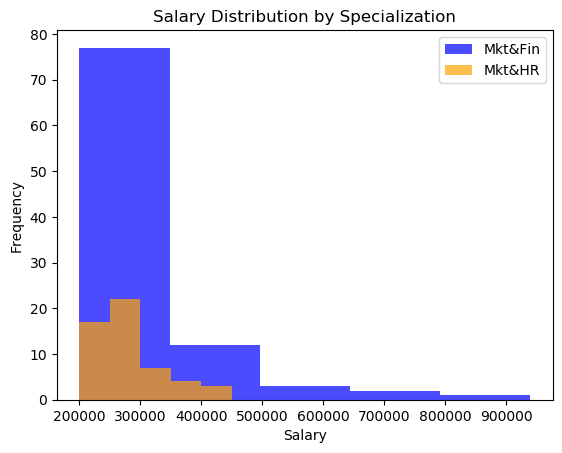

In [7]:
# 5) Which specialization is getting a minimum salary?

import matplotlib.pyplot as plt
#Filter for 'Placed' candidates only
dataset= dataset.drop(dataset[dataset['status'] == 'Not Placed'].index)

# Create histograms for each specialization
plt.hist(
    dataset[dataset['specialisation'] == 'Mkt&Fin']['salary'],
    bins=5,
    alpha=0.7,
    label='Mkt&Fin',
    color='blue'
)
plt.hist(
    dataset[dataset['specialisation'] == 'Mkt&HR']['salary'],
    bins=5,
    alpha=0.7,
    label='Mkt&HR',
    color='orange'
)

# Add titles and labels
plt.title("Salary Distribution by Specialization")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

In [8]:
#6) How many of them getting above 500000 salary?

(dataset['salary']>500000).value_counts() 

False    212
True       3
Name: salary, dtype: int64

In [10]:
#7) Test the Analysis of Variance between etest_p and mba_p at signifance
# level 5%.(Make decision using Hypothesis Testing
import scipy.stats as stats

dataset =  pd.read_csv("Placement.csv")
stats.f_oneway(dataset['etest_p'],dataset['mba_p'] ) 

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [ ]:
# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


from statsmodels.formula.api import ols
import statsmodels.api as sm

dataset = pd.read_csv("Placement.csv")


dataset= dataset.drop(dataset[dataset['status'] == 'Not Placed'].index)
 
print(dataset.isnull().sum())
print(dataset.groupby(['degree_t', 'specialisation']).size())
filtered_data = dataset.dropna()  # Remove rows with NaN values
print(filtered_data.groupby(['degree_t', 'specialisation']).size())
# Fit the two-way ANOVA model
model = ols('salary ~ C(degree_t) + C(specialisation) + C(degree_t):C(specialisation)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

In [ ]:
# 9) Convert the normal distribution to standard normal distribution for
# salary column 
# step 1 of 2

dataset= dataset.drop(dataset[dataset['status'] == 'Not Placed'].index)
import seaborn as sns
# normal distribution
sns.distplot(  dataset['salary'])

In [ ]:
# 9) Convert the normal distribution to standard normal distribution for
# salary column 
# step 2 of 2
def getStandardNormalDistribution(datasetColumn):
# plot standard normal distribution
    import seaborn as sns
    mean = datasetColumn.mean()
    std = datasetColumn.std() 

    z_score = [(value - mean) / std for value in datasetColumn]
    sns.distplot(z_score, kde=True)

getStandardNormalDistribution(dataset['salary'])

C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


sample_mean: 288655.4054054054  , sample_std:  93457.45241958875
The proability of Density OR The area for the range between(700000, 900000) = 5.377578376230696e-06)


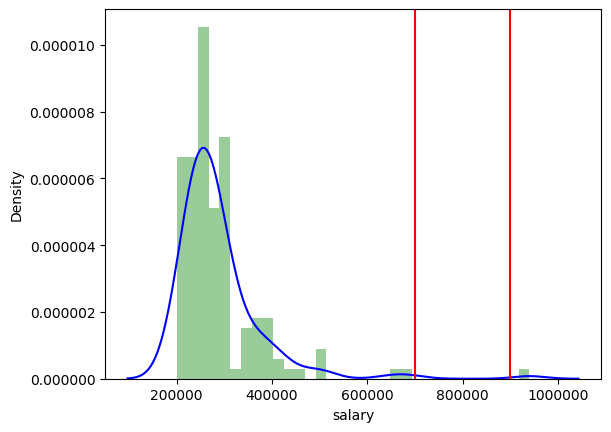

In [11]:
# 10) What is the probability Density Function of the salary range from
# 700000 to 900000?
def getProbablityDensityFunction(datasetColumn, startRange, endRange ):
    import seaborn as sns
    from scipy.stats import norm
    from matplotlib import pyplot
    
    #distplot function will give the histogram and the density curve
    #datasetColumn is the field for which we are finding the density
    #kde True will make the density curve to appear, color bule is for the curve line color, Green is for the histogram
    
    ax = sns.distplot(datasetColumn, kde=True, kde_kws={'color':'blue'}, color='Green')
    #axvline is for the X-axis startRange and endRange for the lines to be in Red
    pyplot.axvline (startRange, color = 'Red')
    pyplot.axvline(endRange, color = 'Red')
     
        
    #sample_mean and sample_std  is for storing the mean and std for the dataset field 
    sample_mean = datasetColumn.mean()
    sample_std = datasetColumn.std()
    print("sample_mean:", sample_mean, " , sample_std: ",sample_std )
    # to find the normal distribution
    distribution = norm(sample_mean,sample_std)
    
    # below values[] is for all the value between the startRange and endRange
    # for each value in the range() the returned value gets places in the values[]
    values = [value for value in range(startRange, endRange)] 
    
    #to get probability distribution use pdf
    # get probability distibution of each value between the start and end range
    probablilites = [distribution.pdf(value) for value in values]
    # get the total probability distribution for the given range
    probabilitiesDensity = sum(probablilites)    
    print("The proability of Density OR The area for the range between({}, {}) = {})" .format(startRange, endRange, probabilitiesDensity))
dataset = pd.read_csv("Placement.csv")
dataset= dataset.drop(dataset[dataset['status'] == 'Not Placed'].index)
getProbablityDensityFunction(dataset['salary'], 700000,900000 )

In [12]:
#11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)
from scipy.stats import ttest_rel
sciTech_etest = dataset[dataset['degree_t']=='Sci&Tech']['etest_p'] 
sciTech_mba = dataset[dataset['degree_t']=='Sci&Tech']['mba_p'] 
ttest_rel(sciTech_etest, sciTech_mba)

Ttest_relResult(statistic=4.915474373730152, pvalue=1.5494422054952274e-05)

In [13]:
#12) Which parameter is highly correlated with salary?
dataset = pd.read_csv("Placement.csv")
dataset= dataset.drop(dataset[dataset['status'] == 'Not Placed'].index)
dataset.corr() 

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.093480,-0.218428,-0.102250,0.041467,-0.072432,0.063764
ssc_p,-0.093480,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,-0.218428,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,-0.102250,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.041467,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,-0.072432,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [ ]:
#13) 
# A) Does work experience relate to high salary 
# B) Do candidated with work experience relate to placed status
# C) what is the % difference of Female performance with Male for in overall academic performance - ssc_p, hsc_p, degree_p, etest_p, mba_

In [ ]:
#13) 
# A) Does work experience relate to high salary 
dataset = pd.read_csv("Placement.csv")
dataset = dataset[dataset['salary'] > 0]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
# Categorize salaries: High if salary > median, else Low
mean_salary = dataset['salary'].mean()
dataset['salary_category'] = ['High' if x > mean_salary else 'Low' for x in dataset['salary']]

# Group by work experience and calculate average salary
avg_salary_by_workex = dataset.groupby('workex')['salary'].mean()

# Plot: Work Experience vs. Average Salary
plt.figure(figsize=(8, 6))
sns.barplot(x='workex', y='salary', data=dataset, ci=None, palette='viridis')
plt.title('Work Experience vs. Average Salary')
plt.xlabel('Work Experience')
plt.ylabel('Average Salary')
plt.show()


In [ ]:
#13) 
# B) Do candidated with work experience relate to placed status
# Create a count plot for 'workex' vs 'status'
dataset = pd.read_csv("Placement.csv")
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x="workex", hue="status", palette="viridis")
plt.title("Work Experience vs Placement Status")
plt.xlabel("Work Experience")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.show()

In [ ]:
#13 
# C) what is the % difference of Female performance with Male for in overall academic performance - ssc_p, hsc_p, degree_p, etest_p, mba_

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Placement.csv")

df = dataset.drop(columns=['sl_no', 'salary', 'status', 'specialisation', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex'])

# Group by Gender and Calculate Mean Academic Performance for Each Metric
mean_performance = df.groupby("gender").mean()

# Calculate Overall Average Performance for Each Gender
mean_performance["Overall Average"] = mean_performance.mean(axis=1)

# Melt the DataFrame to Long Format for Seaborn
melted_df = mean_performance.reset_index().melt(id_vars="gender", 
                                                 var_name="Metric", 
                                                 value_name="Score")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Metric", y="Score", hue="gender", palette="pastel")
plt.title("Performance Comparison by Gender (Individual Metrics and Overall)")
plt.xlabel("Academic Metrics")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
mean_performance["Overall Average"] 


In [ ]:
mean_performance